# Šestka v šiestich

Yzidorovi správne riešenia nikdy nikto nehovoril a výsledky nebývali ani napísané zozadu na hlave babky Ingrid alebo deda Yvana. Keď si malý Ýzy chcel overiť, že či má výsledok správne, musel to tak urobiť sám. Každú úlohu si preto skúsil vyriešiť viacerými nezávislými spôsobmi. Ak mu tieto spôsoby dávali rovnaké / podobné výsledky, bol spokojný. Ak sa líšili, začal si v jednom z prístupov hľadať chybu. Jeho najobľúbenejší prístup (a ten, ktorým vždy začal) bolo *odhadovanie*.

## Odhadovanie

Malý Ýzy sa zamyslel nad otázkou a skúsil veľmi rýchlo vyprodukovať nejaký rozumný odhad. Povedal si, že šanca na aspoň jednu šestku by sa mala pohybovať v desiatkach percent. Ľubovoľný výsledok menší ako $10\%$ by ho prekvapil. Odhad je to veľmi hrubý, ale pomôže nám identifikovať očividné chyby v našich ostatných postupoch. Ak by sme niekde zle vykrátili zlomok a dostali by sme výsledok $5\%$, okamžite by sme zbystrili pozornosť a hľadali si chybu. Tá chyba by mohla byť vo *výpočtoch*, ale aj v *odhade* samotnom. Chyby robíme, je dôležité sa s nimi naučiť pracovať.

Po rýchlom odhade zvykne Ýzy pokračovať k simulácii. Za málo práce dostane totiž väčšinou veľmi dobrý výsledok.

## Simulácia

Na simulovanie používa Ýzy používať programovací jazyk Python. Ak ste v ňom nováčik, silno odporúčame si prečítať prvých pár častí nášho {doc}`úvodu do tohto jazyka </python/01_uvod>`.

V prvom rade budeme potrebovať vedieť vygenerovať náhodu, konkrétne pre nás hod kockou. V Pythone to dosiahneme napríklad takto:

In [1]:
from random import randint # sprístupníme si funkciu na vygenerovanie náhodných celých čísel

def hod_kockou(): # zadefinujeme si vlastnú funkciu "hod_kockou" 
    return randint(1, 7) # vygenerujeme celé číslo medzi 1 (vrátane) a 7 (nevrátane)

# skúsime si hodiť 6 krát kockou
for i in range(6): # zopakuj 6-krát
    print(hod_kockou()) # vypíš výsledok hodu kockou

3
6
5
4
4
2


Python má výhodu, že sa číslo číta tak ľahko ako angličtina samotná. Komentáre k vyššie napísanému kódu by sme pravdepodobne mohli vynechať a stále by ste rozumeli hlavným myšlienkam. Ýzy sa snaží písať taký kód, ktorý sa ľahko číta. Ak by to tak nebolo, dajte mu vedieť a on s tým skúsi niečo spraviť.

Kockou sa nám podarilo hodiť šesťkrát. Nás ale  v skutočnosti zaujíma, či sa v týchto hodoch nachádza aspoň jedna šestka. Na to si napíšeme ďalšiu funkciu

In [2]:
# vrátime buď "True" alebo "False" podľa toho, či aspoň jeden výsledok zo šiestich bola šestka
def sestka_v_siestich_hodoch():
    return any(hod_kockou() == 6 for i in range(6))


Predchádzajúci kód používa mierne pokročilejšie (ale zato odporúčané) spôsoby programovania v Pythone. Ak vám robí ťažkosti, odporúčame si prečítať kapitolu o {doc}`Pythonovských generátoroch </python/02_generatory>`. Následne si pozrieme posledný kus kódu, ktorý spustí prechádzajúcu funkciu obrovský počet krát a povie nám svoj priemerný výsledok.

In [3]:
pocet_pokusov = 1000000
# využijeme fakt, že "True" a "False" sa pri sčítavaní správajú ako 1 a 0
sum(sestka_v_siestich_hodoch() for i in range(pocet_pokusov)) / pocet_pokusov 

0.604236

Toto je naša odsimulovaná šanca na hodenie aspoň jednej šestky zo šiestich pokusov. Sedí s našim širokým odhadom, takže predbežne tento výsledok vyzerá byť vierohodný. Ako posledný spôsob skúsi Ýzy zrátať túto šancu matematicky. Táto cesta je väčšinou najnáročnejšia, ale zato nás v prípade správnych výpočtov odmení úplne presným výsledkom.

## Matematika

Vypočítať tento príklad nie je zložité, ak ste absolvovali ľubovoľný kurz základnej pravdepodobnosti. Tento príklad by sa totiž kľudne mohol označiť ako *typový*. Ak nezvolíte správnu cestu, môže sa postup javiť pracný, nevyžaduje si ale žiaden náročnejší myšlienkový pochod.

Ak chceme vyrátať pravdepodobnosť nejakej udalosti, môžme ju spočítať ako počet možností, ako môže táto udalosť nastať vydelených počtom možností všetkých udalostí. Celá stredoškolská pravdepodobnosť sa dá vyrátať pomocou tohto jednoduchého a intuitívneho postupu. Ak vám nie je úplne jasný, skúste si ho poriadne premyslieť a vyskúšať na rôznych príkladoch (napríklad aj na tomto). Ýzy sa tiež rozhodol použiť tento postup na výpočet jeho úlohy.

### Počet všetkých možností

Ýzy začal zľahka. Počet všetkých možností je v tomto prípade počet všetkých možných postupností hodov kockou o dĺžke 6. Ýzy si tieto možnosti skúsil zakresliť a dostal takýto rýchlo rastúci strom všetkých možností:

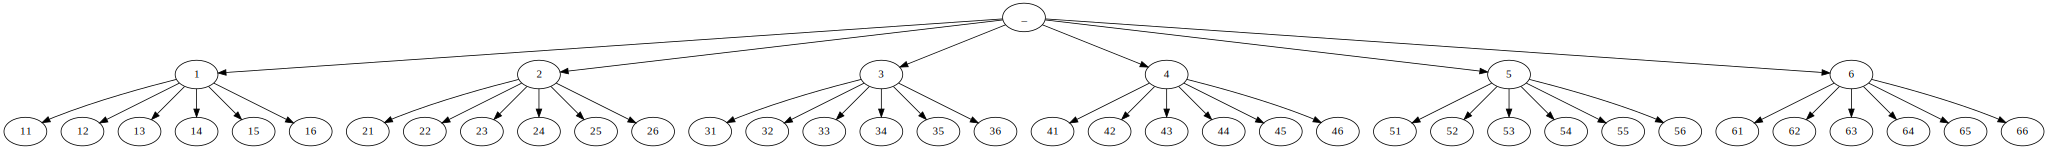

In [4]:
import graphviz

d = graphviz.Digraph()
d.node("_")
for i in range(1,7):
    d.edge("_", str(i))
    for j in range(1, 7):
        d.edge(str(i), str(i) + str(j))
d

```{margin}
Tento graf sme tiež vytvorili pomocou Pythonu. Jeho zdrojový kód si môžte rozkliknúť. Nie je to v skutočnosti nič komplikované.
```
Pre prehľadnosť si rozpísal iba prvé dva hody, z ktorých už pochopil, ako to bude ďalej pokračovať. Každý ďalší hod pridá k jednému z predchádzajúcich možností ďalších 6 možností a teda výsledný počet možností bude $6^6 = 46\,656$.

### Počet všetkých vyhovujúcich možností

Najprv si Ýzy spočítal všetky možnosti, v ktorých je vo výsledku práve jedna šestka. Táto jedna šestka môže byť na šiestich pozíciách. Všetky ostatné hody musia byť odlišné od 6 a teda každé ostatné číslo má iba 5 možností. Ýzy už skúsene vie spojiť tieto dve informácie dokopy, aby získal počet možností $6 \cdot 5^5 = 18\,750$. Toto ale nie je konečný výsledok, pretože vyhovujúca možnosť je aj taká, ak sú vo výsledku dve šestky.

Ako zrátame počet možností pre práve dve šestky? Tieto dve šestky sa musia nachádzať na niektorých pozíciách a zvyšné čísla budú nutne iné ako 6. Výsledok teda bude tvaru $x \cdot 5^4$, kde $x$ je počet možností pre umiestnenie dvoch šestiek medzi 6 hodov. Ak máte natrénované pravdepodobnostné vzorčeky, budete hneď vedieť, že je výsledok $6 \choose 2$. Ýzy ale natrénované vzorčeky nemá a preto si to vždy radšej vymyslí od začiatku. Prvú šestku môžme dať na 6 miest, druhú šestku už len na zvyšných 5 miest. Dokopy máme teda $6 \cdot 5 = 30$ možností. Niektoré z týchto možností sa ale opakujú, napríklad možnosť, kde prvá šestka bude na prvom mieste, druhá na druhom a možnosť, kde prvá šestka bude na druhom a druhá na prvom mieste. Počet možností, ktoré sme si spočítali, by sme teda radi vydelili počtom možných usporiadaní dvoch šestiek, teda číslom 2. Počet usporiadaní šestiek bude $\tfrac{6 \cdot 5}{2} = 15$. Celkový počet možností teda bude $15 \cdot 5^4 = 9\,375$.

Budeme musieť ale pokračovať, lebo šestiek môže byť ešte aj viac. Nebudeme sa už rozpisovať, lebo myšlienkové pochody sú úplne rovnaké. Výsledky dostaneme ako 
```{math}
\text{3 šestky}:& \quad \tfrac{6 \cdot 5 \cdot 4}{3 \cdot 2} \cdot 5^3  \qq{=} 2\,700,\\
\text{4 šestky}:& \quad \tfrac{6 \cdot 5 \cdot 4 \cdot 3}{4 \cdot 3 \cdot 2} \cdot 5^2 \qq{=} 375,\\
\text{5 šestiek}:& \quad \tfrac{6 \cdot 5 \cdot 4 \cdot 3 \cdot 2}{5 \cdot 4 \cdot 3 \cdot 2} \cdot 5  \qq{=} 30, \\
\text{6 šestiek}:& \quad \tfrac{6 \cdot 5 \cdot 4 \cdot 3 \cdot 2 \cdot 1}{6 \cdot 5 \cdot 4 \cdot 3 \cdot 2} \cdot 5^0 \qq{=} 1. \\
```
Po spočítaní všetkých našich výsledkov dostávame počet všetkých vyhovujúcich možností dostávame ako:
```{math}
18\,750 + 9\,375 + 2\,700 + 375 + 30 + 1 = 31\,231.
```

### Konečný výsledok

Fuh, to bola makačka. Chudák Ýzy je z toho celý spotený. Konečný výsledok vyšiel ako 
```{math}
\frac{31\,231}{46\,656} \approx 0.66494 
```
Ýzy prehlásil, že tento výsledok síce sedí s odhadom, ale od simulácií je odlišný o zhruba $6\%$. Keďže sme robili v simulácií až milión pokusov, očakával Ýzy menšiu odchýlku. Celé to zaváňa nejakou chybou. 

```{admonition} Úloha
:class: tip
Stala sa chyba? Ak áno, kde? Ak nie, prečo sú výsledky také odlišné?
```


```{toctree}
:hidden:
:titlesonly:


02_sestka2
02_sestka3
02_sestka4
02_sestka5
02_sestka6
```